## **Task**
Застосуйте описані вище методи кластеризації на датасеті винних сортів UCI ML Wine Data Set. Завантажити його можна командою datasets.load_wine.

In [48]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [49]:
df = datasets.load_wine()

In [50]:
from sklearn import preprocessing

In [51]:
norm_df = preprocessing.normalize(df.data)

In [52]:
model = KMeans(n_clusters=2)

In [53]:
model.fit(norm_df.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [54]:
predictions = model.predict(norm_df.data)

In [55]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1]


In [57]:
cluster_0 = np.array(norm_df.data)[predictions == 0]
cluster_1 = np.array(norm_df.data)[predictions == 1]


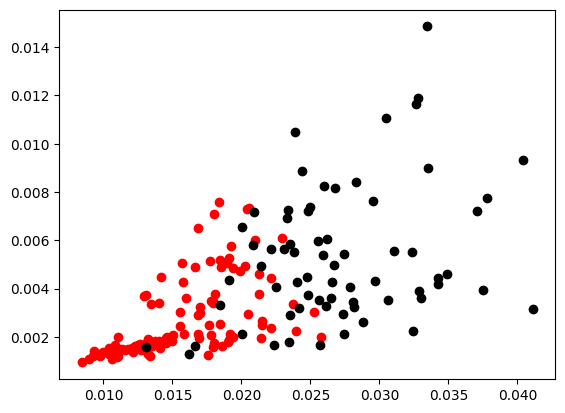

In [58]:
plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')


In [64]:
model2 = KMeans(n_clusters=2)

In [65]:
model2.fit(df.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [66]:
predictions2 = model2.predict(df.data)

In [67]:
print(predictions2)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [68]:
cluster_00 = df.data[predictions == 0]
cluster_11 = df.data[predictions == 1]

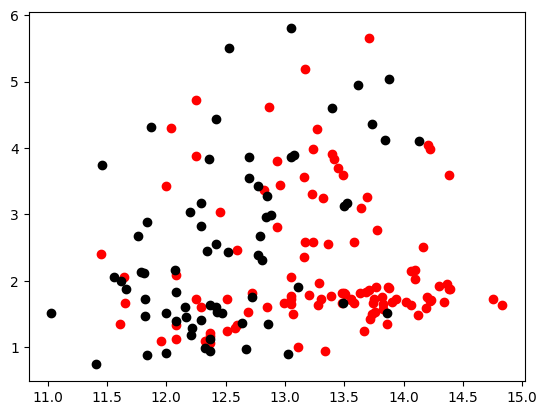

In [69]:
plt.scatter(cluster_00[:,0] , cluster_00[:,1] , color = 'red')
plt.scatter(cluster_11[:,0] , cluster_11[:,1] , color = 'black')

In [70]:
cluster_0

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.76914658e-02, 5.16221128e-03, 3.27424143e-03, ...,
        9.24181048e-04, 2.05960348e-03, 9.90193980e-01],
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01]])

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [104]:
dbscan = DBSCAN(eps=0.4, min_samples=3)

In [105]:
dbscan.fit(df.data)

DBSCAN(eps=0.4, min_samples=3)

In [106]:
pca = PCA(n_components=2).fit(df.data)
pca_2d = pca.transform(df.data)

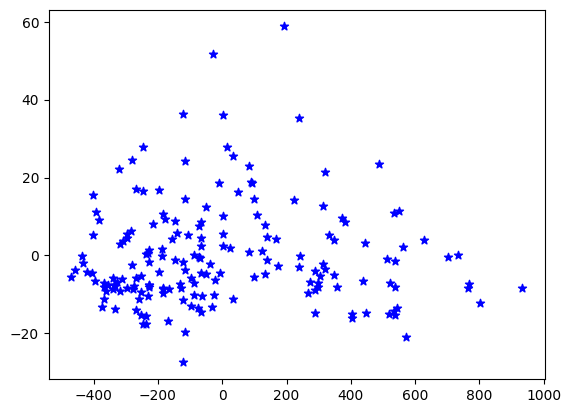

In [109]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')


plt.show()

In [98]:
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [114]:
import seaborn as sns

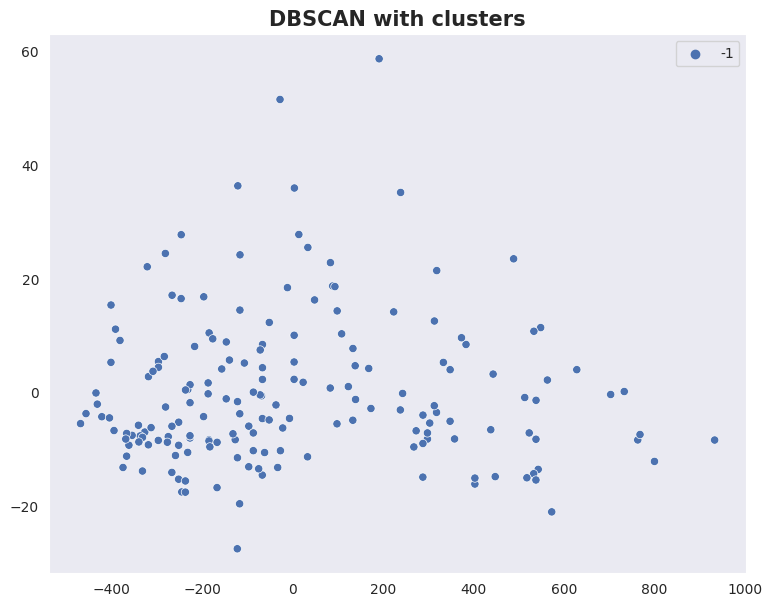

In [125]:
sns.set_style('dark')
pca2 = PCA(n_components=3)
wine_pca = pca2.fit_transform(df.data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("DBSCAN with clusters",fontsize=15,fontweight="bold")
plt.show()

In [122]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [123]:
mergings = linkage(df.data, method = 'complete')

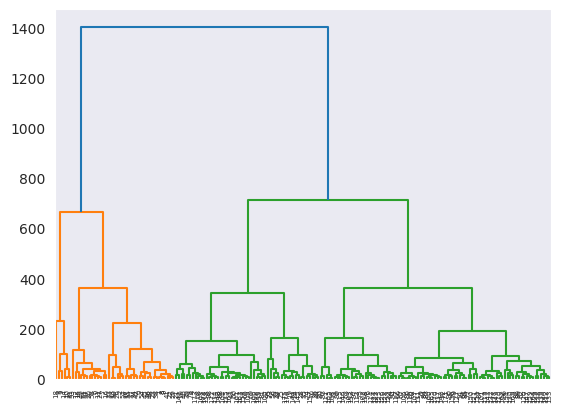

In [124]:
clusters = dendrogram(mergings,leaf_rotation=90)